In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Adding the outputs of logic gates into a table

In [3]:
logic_gates = {'A':[0,0,1,1,2,2],'B':[0,1,0,1,0,1],'NEW':[0,1,1,0,0,1]}
table = pd.DataFrame(data = logic_gates,columns=['A','B','NEW'],index=[1,2,3,4,5,6])
print(table)

   A  B  NEW
1  0  0    0
2  0  1    1
3  1  0    1
4  1  1    0
5  2  0    0
6  2  1    1


# defining and initializing the weights and biases for each neuron

In [4]:
layer_1_w = tf.Variable(tf.random_normal([2,2]))
layer_1_b = tf.Variable(tf.random_normal([2,1]))
layer_2_w = tf.Variable(tf.random_normal([1,2]))
layer_2_b = tf.Variable(.15)

# Defining mean square error

In [5]:
err = 0
for a,b,c in zip(table['A'],table['B'],table['NEW']):
    output_l1 = tf.sigmoid(tf.add(tf.matmul(layer_1_w,[[float(a)],[float(b)]]),layer_1_b))
    output_l2 = tf.sigmoid(tf.add(tf.matmul(layer_2_w,output_l1),layer_2_b))
    err += (output_l2-c)**2 

# some useful variables

In [6]:
opt = tf.train.GradientDescentOptimizer(learning_rate=.1)
tran = opt.minimize(err)

# Training and Predicting 

In [33]:
params = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    training_steps = 10000
    for i in range(training_steps):
        sess.run(tran)
    print("error:{0}".format(sess.run(err)))
    for a,b,c in zip(table['A'],table['B'],table['NEW']):
        output_l1 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1_w,[[float(a)],[float(b)]]),layer_1_b))
        output_l2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2_w,output_l1),layer_2_b))
        print('A:{0} B:{1} C:{2} pred:{3}'.format(a,b,c,sess.run(tf.round(output_l2[0][0]))))
    params.append([sess.run([layer_1_w,layer_1_b,layer_2_w,layer_2_b])])


error:[[0.0682481]]
A:0 B:0 C:0 pred:0.0
A:0 B:1 C:1 pred:1.0
A:1 B:0 C:1 pred:1.0
A:1 B:1 C:0 pred:0.0
A:2 B:0 C:0 pred:0.0
A:2 B:1 C:1 pred:1.0


## ANALYSIS OF PARAMETERS

Lets plot the output for each point in plane

In [34]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [128]:
def predict(x):
    l1 = sigmoid(np.dot(params[0][0][0],x)+params[0][0][1])
    l2 = sigmoid(np.dot(params[0][0][2],l1)+params[0][0][3])
    Neuron = {'N1':l1[0][0],'N2':l1[1][0],'N3':l2[0][0]}
    return Neuron['N1'],Neuron['N2'],round(Neuron['N3'],6)

## SOLVED ! 
    

In [141]:
for a,b,c in zip(table['A'],table['B'],table['NEW']):
    node1,node2,node3 = predict([[float(a)],[float(b)]])
    print("A:{0} | B:{1} | C:{2}| neuron_1 -> {3} | neuron_2 -> {4}  | neuron_3 -> {5}".format(a,b,c,round(node1,1),round(node2,1),round(node3,1)))

A:0 | B:0 | C:0| neuron_1 -> 1.0 | neuron_2 -> 0.3  | neuron_3 -> 0.1
A:0 | B:1 | C:1| neuron_1 -> 1.0 | neuron_2 -> 0.1  | neuron_3 -> 0.9
A:1 | B:0 | C:1| neuron_1 -> 0.0 | neuron_2 -> 0.7  | neuron_3 -> 0.9
A:1 | B:1 | C:0| neuron_1 -> 1.0 | neuron_2 -> 0.3  | neuron_3 -> 0.1
A:2 | B:0 | C:0| neuron_1 -> 0.0 | neuron_2 -> 0.9  | neuron_3 -> 0.1
A:2 | B:1 | C:1| neuron_1 -> 0.0 | neuron_2 -> 0.6  | neuron_3 -> 0.9


In [144]:
print("SIGMOID[(w1 x n1)+(w2 x n2)] + b = output")
for a,b in zip(table['A'],table['B']):
    node1,node2,node3 = predict([[float(a)],[float(b)]])
    print('SIGMOID[({0} x {3}) + ({1} x {4}) + {2}] ~ {5} '.format(params[0][0][2][0][0],params[0][0][2][0][1],params[0][0][3],round(node1,1),round(node2,1),round(node3)))
    

SIGMOID[(w1 x n1)+(w2 x n2)] + b = output
SIGMOID[(-11.0929431915 x 1.0) + (-19.0086269379 x 0.3) + 14.8242788315] ~ 0.0 
SIGMOID[(-11.0929431915 x 1.0) + (-19.0086269379 x 0.1) + 14.8242788315] ~ 1.0 
SIGMOID[(-11.0929431915 x 0.0) + (-19.0086269379 x 0.7) + 14.8242788315] ~ 1.0 
SIGMOID[(-11.0929431915 x 1.0) + (-19.0086269379 x 0.3) + 14.8242788315] ~ 0.0 
SIGMOID[(-11.0929431915 x 0.0) + (-19.0086269379 x 0.9) + 14.8242788315] ~ 0.0 
SIGMOID[(-11.0929431915 x 0.0) + (-19.0086269379 x 0.6) + 14.8242788315] ~ 1.0 


In [133]:
def outputs():
    em1 = []
    em2 = []
    em3 = []
    i = -.1
    while i<= 1.1:
        j= -.1
        em11 = []
        em22 = []
        em33 = []
        while j <= 2.1:
            a,b,c = predict([[j],[i]])
            em11.append(a)
            em22.append(b)
            em33.append(c)
            j += .01
        em1.append(em11)
        em2.append(em22)
        em3.append(em33)
        i += .01 
    return em1,em2,em3


In [134]:
n1,n2,n3 = outputs()
# for i in range(len(n3)):
#     print(n3[i])

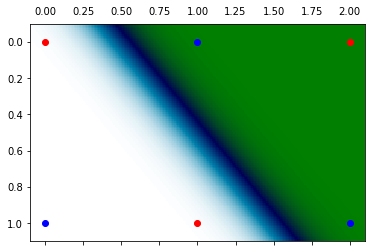

In [137]:
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.labeltop'] = True
plt.imshow(n1,aspect='auto', interpolation='none' ,cmap=plt.cm.ocean, origin='upper',  extent=(-.1,2.1,1.1,-.1))#,origin='lower')
plt.plot([0,1,2],[0,1,0],'ro',label='0')
plt.plot([0,1,2],[1,0,1],'bo',label='1')


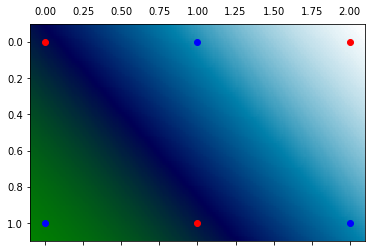

In [138]:
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.labeltop'] = True
plt.imshow(n2,aspect='auto', interpolation='none' ,cmap=plt.cm.ocean,origin='upper',  extent=(-.1,2.1,1.1,-.1))#,origin='lower')
plt.plot([0,1,2],[0,1,0],'ro',label='0')
plt.plot([0,1,2],[1,0,1],'bo',label='1')

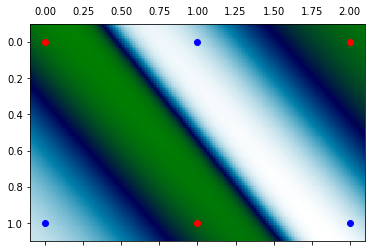

In [139]:
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.labeltop'] = True
plt.imshow(n3,aspect='auto', interpolation='none' ,cmap=plt.cm.ocean,origin='upper',  extent=(-.1,2.1,1.1,-.1))#,origin='lower')
plt.plot([0,1,2],[0,1,0],'ro',label='0')
plt.plot([0,1,2],[1,0,1],'bo',label='1')